In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
#universe of discourse
light_intensity = ctrl.Antecedent(np.arange(0, 10001, 1), 'Light Intensity (lux)')
aperture_value = ctrl.Antecedent(np.arange(0, 23, 1), 'Aperture Value')
shutter_speed = ctrl.Antecedent(np.arange(0, 31, 1), 'Shutter Speed')
iso_value = ctrl.Consequent(np.arange(0, 6401, 1), 'ISO Value')

d:\Program Files\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


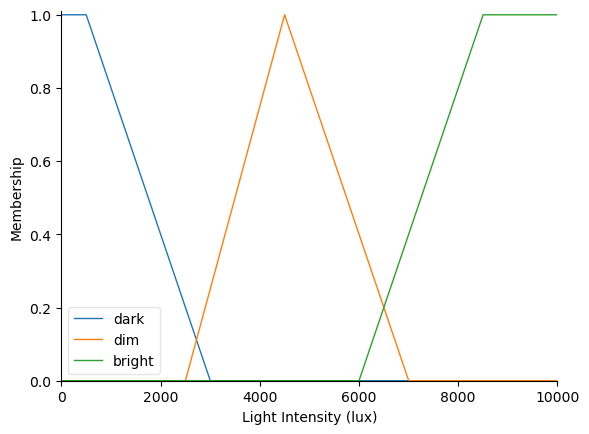

In [3]:
#lingustic variables => dark, dim, bright
light_intensity['dark'] = fuzz.trapmf(light_intensity.universe, [0, 0, 500, 3000])
light_intensity['dim'] = fuzz.trimf(light_intensity.universe, [2500, 4500, 7000])
light_intensity['bright'] = fuzz.trapmf(light_intensity.universe, [6000, 8500, 10000, 10000])
light_intensity.view()
plt.show()

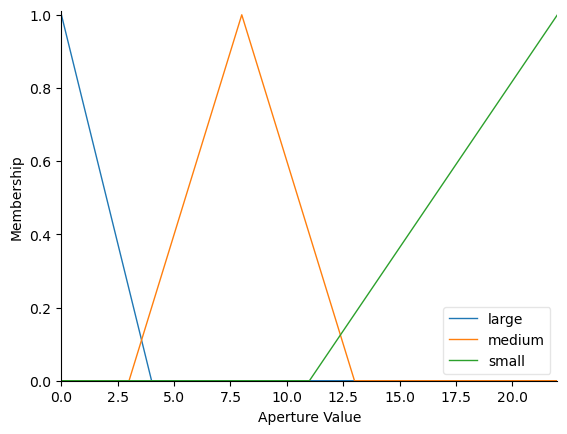

In [4]:
#lingustic variables => large, medium, small
aperture_value['large'] = fuzz.trimf(aperture_value.universe, [0, 0, 4])
aperture_value['medium'] = fuzz.trimf(aperture_value.universe, [3, 8, 13])
aperture_value['small'] = fuzz.trimf(aperture_value.universe, [11, 22, 22])
aperture_value.view()
plt.show()

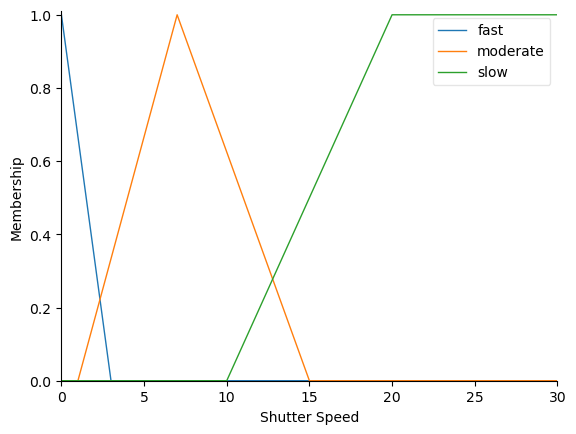

In [5]:
#lingustic variables => fast, moderate, slow
shutter_speed['fast'] = fuzz.trimf(shutter_speed.universe, [0, 0, 3])
shutter_speed['moderate'] = fuzz.trimf(shutter_speed.universe, [1, 7, 15])
shutter_speed['slow'] = fuzz.trapmf(shutter_speed.universe, [10, 20, 30, 30])
shutter_speed.view()
plt.show()

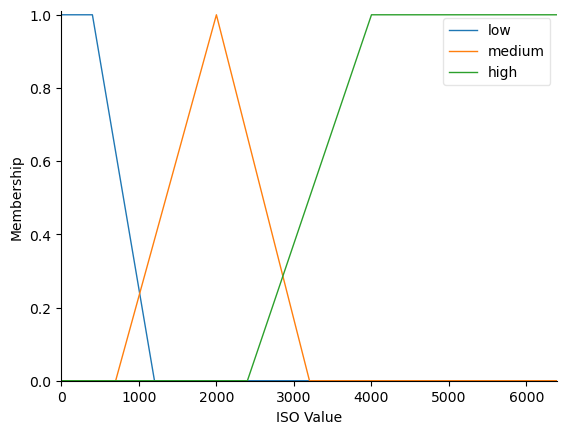

In [6]:
#lingustic variables => low, medium, high
iso_value['low'] = fuzz.trapmf(iso_value.universe, [0, 0, 400, 1200])
iso_value['medium'] = fuzz.trimf(iso_value.universe, [700, 2000, 3200])
iso_value['high'] = fuzz.trapmf(iso_value.universe, [2400, 4000, 6400, 6400])
iso_value.view()
plt.show()

In [8]:
rule1 = ctrl.Rule(light_intensity['dark'] & aperture_value['large'] & shutter_speed['fast'], iso_value['high'])
rule2 = ctrl.Rule(light_intensity['dark'] & aperture_value['large'] & shutter_speed['moderate'], iso_value['high'])
rule3 = ctrl.Rule(light_intensity['dark'] & aperture_value['large'] & shutter_speed['slow'], iso_value['medium'])

rule4 = ctrl.Rule(light_intensity['dark'] & aperture_value['medium'] & shutter_speed['fast'], iso_value['high'])
rule5 = ctrl.Rule(light_intensity['dark'] & aperture_value['medium'] & shutter_speed['moderate'], iso_value['medium'])
rule6 = ctrl.Rule(light_intensity['dark'] & aperture_value['medium'] & shutter_speed['slow'], iso_value['medium'])

rule7 = ctrl.Rule(light_intensity['dark'] & aperture_value['small'] & shutter_speed['fast'], iso_value['high'])
rule8 = ctrl.Rule(light_intensity['dark'] & aperture_value['small'] & shutter_speed['moderate'], iso_value['high'])
rule9 = ctrl.Rule(light_intensity['dark'] & aperture_value['small'] & shutter_speed['slow'], iso_value['medium'])

rule10 = ctrl.Rule(light_intensity['dim'] & aperture_value['large'] & shutter_speed['fast'], iso_value['high'])
rule11 = ctrl.Rule(light_intensity['dim'] & aperture_value['large'] & shutter_speed['moderate'], iso_value['high'])
rule12 = ctrl.Rule(light_intensity['dim'] & aperture_value['large'] & shutter_speed['slow'], iso_value['low'])

rule13 = ctrl.Rule(light_intensity['dim'] & aperture_value['medium'] & shutter_speed['fast'], iso_value['medium'])
rule14 = ctrl.Rule(light_intensity['dim'] & aperture_value['medium'] & shutter_speed['moderate'], iso_value['medium'])
rule15 = ctrl.Rule(light_intensity['dim'] & aperture_value['medium'] & shutter_speed['slow'], iso_value['low'])

rule16 = ctrl.Rule(light_intensity['dim'] & aperture_value['small'] & shutter_speed['fast'], iso_value['medium'])
rule17 = ctrl.Rule(light_intensity['dim'] & aperture_value['small'] & shutter_speed['moderate'], iso_value['low'])
rule18 = ctrl.Rule(light_intensity['dim'] & aperture_value['small'] & shutter_speed['slow'], iso_value['low'])

rule19 = ctrl.Rule(light_intensity['bright'] & aperture_value['large'] & shutter_speed['fast'], iso_value['medium'])
rule20 = ctrl.Rule(light_intensity['bright'] & aperture_value['large'] & shutter_speed['moderate'], iso_value['low'])
rule21 = ctrl.Rule(light_intensity['bright'] & aperture_value['large'] & shutter_speed['slow'], iso_value['low'])

rule22 = ctrl.Rule(light_intensity['bright'] & aperture_value['medium'] & shutter_speed['fast'], iso_value['medium'])
rule23 = ctrl.Rule(light_intensity['bright'] & aperture_value['medium'] & shutter_speed['moderate'], iso_value['low'])
rule24 = ctrl.Rule(light_intensity['bright'] & aperture_value['medium'] & shutter_speed['slow'], iso_value['low'])

rule25 = ctrl.Rule(light_intensity['bright'] & aperture_value['small'] & shutter_speed['fast'], iso_value['low'])
rule26 = ctrl.Rule(light_intensity['bright'] & aperture_value['small'] & shutter_speed['moderate'], iso_value['low'])
rule27 = ctrl.Rule(light_intensity['bright'] & aperture_value['small'] & shutter_speed['slow'], iso_value['low'])


In [9]:
#creating the control system
photo_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7, rule8,
    rule9, rule10, rule11, rule12,
    rule13, rule14, rule15, rule16,
    rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24,
    rule25, rule26, rule27
])

photo = ctrl.ControlSystemSimulation(photo_ctrl)

3977.0


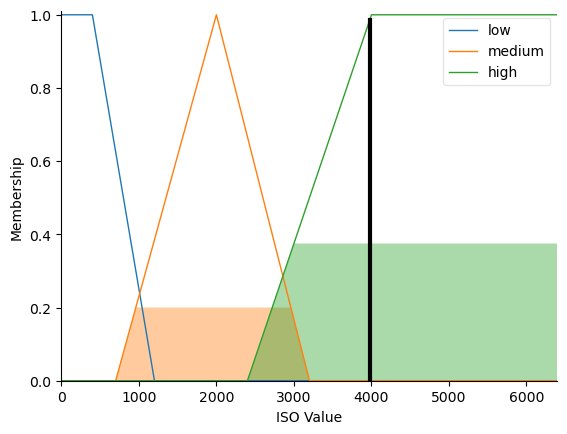

In [10]:
#inputs
photo.input['Light Intensity (lux)'] = 1000
photo.input['Aperture Value'] = 1.2
photo.input['Shutter Speed'] = 12
photo.compute()

#simulation
photo.compute()
print(round(photo.output['ISO Value'], 0))
iso_value.view(sim=photo)
plt.show()